In [1]:
using RCall
using DataFrames, DataFramesMeta
using CSV
using DataVoyager
ENV["LINES"] = 10
ENV["COLUMNS"]=10000;

### Load Covid Data

source: https://covid.ourworldindata.org/data/owid-covid-data.csv

In [2]:
df = CSV.read("../data/owid-covid-data.csv",DataFrame)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
,String,String,String,Date…,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,AFG,Asia,Afghanistan,2020-01-23,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-24,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-25,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-26,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-27,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-28,missing,0.0,0.0,missing,0.0,0.0,missing,0.0,0.0,missing,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-29,missing,0.0,0.0,missing,0.0,0.0,missing,0.0,0.0,missing,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,0.0,3.89283e7,54.422,18.6,2.581,1.337,1803.99,missing,597.029,9.59,missing,missing,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-30,missing,0.0,0.0,missing,0.0,0.0,missing,0.0,0.0,missing,0.0,0.0,missing,missing,missi

### Check Data Summary

In [3]:
R"summary($df)"

RObject{StrSxp}
   iso_code          continent           location              date           
 Length:61935       Length:61935       Length:61935       Min.   :2020-01-01  
 Class :character   Class :character   Class :character   1st Qu.:2020-04-13  
 Mode  :character   Mode  :character   Mode  :character   Median :2020-07-04  
                                                          Mean   :2020-07-03  
                                                          3rd Qu.:2020-09-24  
                                                          Max.   :2020-12-14  
                                                                              
  total_cases         new_cases      new_cases_smoothed   total_deaths   
 Min.   :       1   Min.   :     0   Min.   :     0.00   Min.   :     1  
 1st Qu.:     376   1st Qu.:     0   1st Qu.:     0.57   1st Qu.:    23  
 Median :    3979   Median :    14   Median :    20.29   Median :   127  
 Mean   :  118829   Mean   :  1180   Mean   :  1163.99  

In [4]:
ENV["LINES"] = 10
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,iso_code,,AFG,,ZWE,190,,String
2,continent,,Africa,,South America,6,,String
3,location,,Afghanistan,,Zimbabwe,190,,String
4,date,,2020-01-01,,2020-12-14,349,,Date
5,total_cases,1.18829e5,1.0,3979.0,1.65195e7,,8960,"Union{Missing, Float64}"
6,new_cases,1179.72,0.0,14.0,823225.0,,132,"Union{Missing, Float64}"
7,new_cases_smoothed,1163.99,0.0,20.286,215424.0,,1077,"Union{Missing, Float64}"
8,total_deaths,4310.46,1.0,127.0,300479.0,,16945,"Union{Missing, Float64}"
9,new_deaths,26.3313,0.0,0.0,4143.0,,132,"Union{Missing, Float64}"


### Column Subset: Remove redundant columns

In [5]:
ENV["LINES"] = 10
features = [:continent,:location,:date,:diabetes_prevalence,:cardiovasc_death_rate,:extreme_poverty,:gdp_per_capita,:hosp_patients,:hospital_beds_per_thousand,:icu_patients,:new_cases,:new_deaths,:population, :population_density,:total_cases,:total_deaths,:weekly_hosp_admissions,:weekly_icu_admissions]
dfn = df[:,features]

,continent,location,date,diabetes_prevalence,cardiovasc_death_rate,extreme_poverty,gdp_per_capita,hosp_patients,hospital_beds_per_thousand,icu_patients,new_cases,new_deaths,population,population_density,total_cases,total_deaths,weekly_hosp_admissions,weekly_icu_admissions
,String,String,Date…,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?
1,Asia,Afghanistan,2020-01-23,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
2,Asia,Afghanistan,2020-01-24,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
3,Asia,Afghanistan,2020-01-25,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
4,Asia,Afghanistan,2020-01-26,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
5,Asia,Afghanistan,2020-01-27,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
6,Asia,Afghanistan,2020-01-28,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
7,Asia,Afghanistan,2020-01-29,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
8,Asia,Afghanistan,2020-01-30,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing
9,Asia,Afghanistan,2020-01-31,9.59,597.029,missing,1803.99,missing,0.5,missing,0.0,0.0,3.89283e7,54.422,missing,missing,missing,missing


### Row Subset: Filter  Europe

In [6]:
dfeu = R"""
          library(tidyverse)
          $dfn %>% filter(continent == "Europe")
        """ |> rcopy

┌ Warning: RCall.jl: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
│ ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
│ ✔ tibble  3.0.4     ✔ dplyr   1.0.2
│ ✔ tidyr   1.1.2     ✔ stringr 1.4.0
│ ✔ readr   1.4.0     ✔ forcats 0.5.0
│ ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
│ ✖ dplyr::filter() masks stats::filter()
│ ✖ dplyr::lag()    masks stats::lag()
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160


,continent,location,date,diabetes_prevalence,cardiovasc_death_rate,extreme_poverty,gdp_per_capita,hosp_patients,hospital_beds_per_thousand,icu_patients,new_cases,new_deaths,population,population_density,total_cases,total_deaths,weekly_hosp_admissions,weekly_icu_admissions
,String,String,Date…,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?
1,Europe,Albania,2020-01-23,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
2,Europe,Albania,2020-01-24,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
3,Europe,Albania,2020-01-25,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
4,Europe,Albania,2020-01-26,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
5,Europe,Albania,2020-01-27,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
6,Europe,Albania,2020-01-28,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
7,Europe,Albania,2020-01-29,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
8,Europe,Albania,2020-01-30,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
9,Europe,Albania,2020-01-31,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing


In [7]:
dfeu=@where(dfn, :continent .== "Europe")

,continent,location,date,diabetes_prevalence,cardiovasc_death_rate,extreme_poverty,gdp_per_capita,hosp_patients,hospital_beds_per_thousand,icu_patients,new_cases,new_deaths,population,population_density,total_cases,total_deaths,weekly_hosp_admissions,weekly_icu_admissions
,String,String,Date…,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?
1,Europe,Albania,2020-01-23,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
2,Europe,Albania,2020-01-24,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
3,Europe,Albania,2020-01-25,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
4,Europe,Albania,2020-01-26,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
5,Europe,Albania,2020-01-27,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
6,Europe,Albania,2020-01-28,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
7,Europe,Albania,2020-01-29,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
8,Europe,Albania,2020-01-30,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing
9,Europe,Albania,2020-01-31,10.08,304.195,1.1,11803.4,missing,2.89,missing,0.0,0.0,2.8778e6,104.871,missing,missing,missing,missing


### Visualize Europe Covid Trend

In [8]:
dfeu |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000037) paused, 0 bytes waiting), Process(`/Users/ppalmes/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/ppalmes/.julia/packages/Electron/MNI24/src/main.js /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-b25e5e3c417111eb2fbeb716efc9e995 /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-sn-b25e66ca417111eb09c707c0bbb9c751 mGc9pk0yic78bJOa0Pq8NKo9zAFJMxm9MKFZBSCuy+v28qX3+hcVfv4SBIK6yDN0qs3ofBl+62GPCFJoLIbWWh6A5dGz4rNAVsIsj+zJFhvd3tQlAHnMV8jKGvok2twqUp4/hDj+EfMDTQ/2eklnG8H2iH4LxVDlMl1v4zaa25E=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(sz_max:128,sz_curr:0)))

### Zoom-in to Ireland

In [9]:
dfire=R"$dfeu %>% filter(location=='Ireland')" |> rcopy

,continent,location,date,diabetes_prevalence,cardiovasc_death_rate,extreme_poverty,gdp_per_capita,hosp_patients,hospital_beds_per_thousand,icu_patients,new_cases,new_deaths,population,population_density,total_cases,total_deaths,weekly_hosp_admissions,weekly_icu_admissions
,String,String,Date…,Float64,Float64,Float64,Float64,Float64?,Float64,Float64?,Float64,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?
1,Europe,Ireland,2020-01-23,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
2,Europe,Ireland,2020-01-24,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
3,Europe,Ireland,2020-01-25,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
4,Europe,Ireland,2020-01-26,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
5,Europe,Ireland,2020-01-27,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
6,Europe,Ireland,2020-01-28,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
7,Europe,Ireland,2020-01-29,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
8,Europe,Ireland,2020-01-30,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing
9,Europe,Ireland,2020-01-31,3.28,126.459,0.2,67335.3,missing,2.96,missing,0.0,0.0,4.9378e6,69.874,missing,missing,missing,missing


In [10]:
dfire |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000037) paused, 0 bytes waiting), Process(`/Users/ppalmes/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/ppalmes/.julia/packages/Electron/MNI24/src/main.js /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-b25e5e3c417111eb2fbeb716efc9e995 /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-sn-b25e66ca417111eb09c707c0bbb9c751 mGc9pk0yic78bJOa0Pq8NKo9zAFJMxm9MKFZBSCuy+v28qX3+hcVfv4SBIK6yDN0qs3ofBl+62GPCFJoLIbWWh6A5dGz4rNAVsIsj+zJFhvd3tQlAHnMV8jKGvok2twqUp4/hDj+EfMDTQ/2eklnG8H2iH4LxVDlMl1v4zaa25E=`, ProcessRunning), [2 windows]), 2, true, Channel{Any}(sz_max:128,sz_curr:0)))

In [11]:
dfcases = R"$dfeu %>% select(location,date,new_cases,new_deaths,hosp_patients,icu_patients)" |> rcopy

,location,date,new_cases,new_deaths,hosp_patients,icu_patients
,String,Date…,Float64,Float64,Float64?,Float64?
1,Albania,2020-01-23,0.0,0.0,missing,missing
2,Albania,2020-01-24,0.0,0.0,missing,missing
3,Albania,2020-01-25,0.0,0.0,missing,missing
4,Albania,2020-01-26,0.0,0.0,missing,missing
5,Albania,2020-01-27,0.0,0.0,missing,missing
6,Albania,2020-01-28,0.0,0.0,missing,missing
7,Albania,2020-01-29,0.0,0.0,missing,missing
8,Albania,2020-01-30,0.0,0.0,missing,missing
9,Albania,2020-01-31,0.0,0.0,missing,missing


In [12]:
dfcases |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000037) paused, 0 bytes waiting), Process(`/Users/ppalmes/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/ppalmes/.julia/packages/Electron/MNI24/src/main.js /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-b25e5e3c417111eb2fbeb716efc9e995 /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-sn-b25e66ca417111eb09c707c0bbb9c751 mGc9pk0yic78bJOa0Pq8NKo9zAFJMxm9MKFZBSCuy+v28qX3+hcVfv4SBIK6yDN0qs3ofBl+62GPCFJoLIbWWh6A5dGz4rNAVsIsj+zJFhvd3tQlAHnMV8jKGvok2twqUp4/hDj+EfMDTQ/2eklnG8H2iH4LxVDlMl1v4zaa25E=`, ProcessRunning), [3 windows]), 3, true, Channel{Any}(sz_max:128,sz_curr:0)))

### Plot interesting trends from the visualization

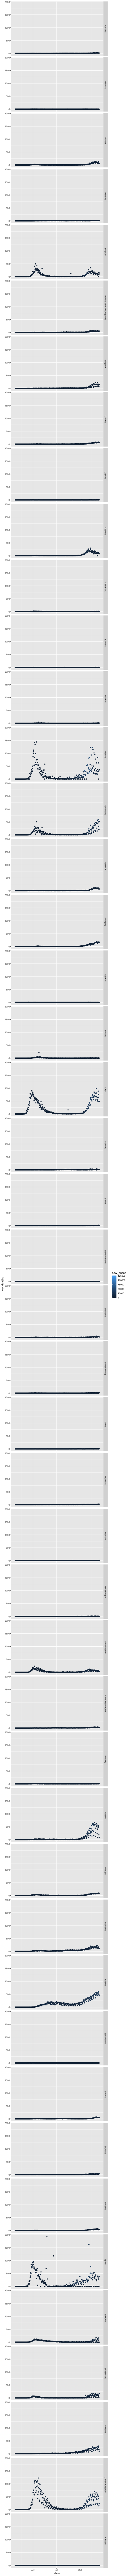

RObject{VecSxp}


In [13]:
RCall.rcall_p(:options, rcalljl_options=Dict(:width => 500, :height => 10000))
R"""
library(ggplot2)

ggplot($dfcases,aes(date,new_deaths))+
  geom_point(aes(color=new_cases))+
  facet_grid(location ~ .)
"""

In [14]:
RCall.rcall_p(:options, rcalljl_options=Dict(:width => 500, :height => 200))

function plotdeaths(df::DataFrame,ctry::String)
  R"""
     library(ggplot2)
     ctr = $df %>% filter(location == $ctry)
     ggplot(ctr,aes(date,new_deaths))+geom_point(aes(color=new_cases))
  """
end

function plotcases(df::DataFrame,ctry::String)
  R"""
     library(ggplot2)
     ctr = $df %>% filter(location == $ctry)
     ggplot(ctr,aes(date,new_cases))+geom_point(aes(color=new_deaths))
  """
end

plotcases (generic function with 1 method)

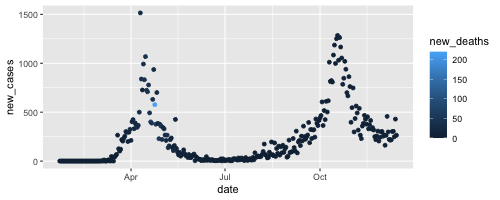

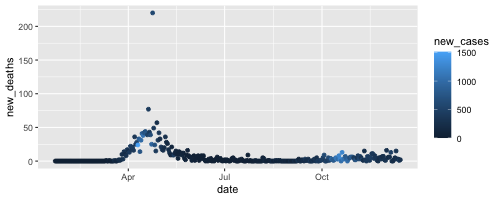

(RObject{VecSxp}
, RObject{VecSxp}
)

In [15]:
(plotcases(df,"Ireland"),plotdeaths(df,"Ireland"))

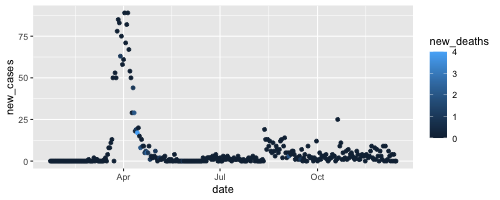

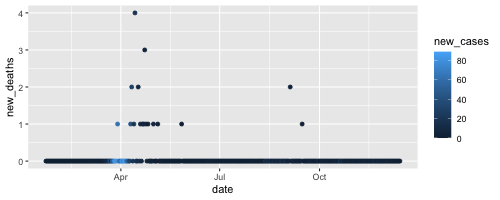

(RObject{VecSxp}
, RObject{VecSxp}
)

In [16]:
(plotcases(df,"New Zealand"), plotdeaths(df,"New Zealand"))

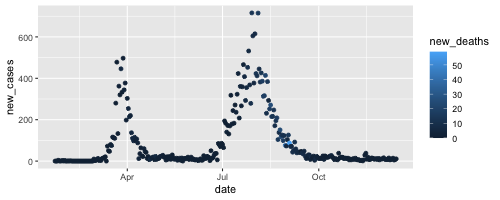

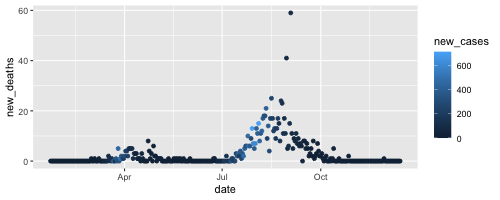

(RObject{VecSxp}
, RObject{VecSxp}
)

In [17]:
(plotcases(df,"Australia"), plotdeaths(df,"Australia"))

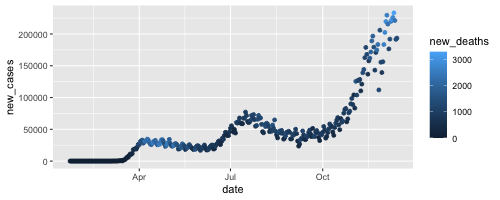

┌ Warning: RCall.jl: Warning: Removed 1 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160
┌ Warning: RCall.jl: Warning: Removed 1 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160


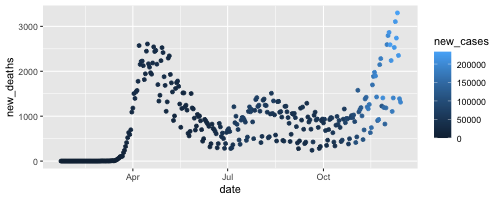

(RObject{VecSxp}
, RObject{VecSxp}
)

In [18]:
(plotcases(df,"United States"), plotdeaths(df,"United States"))

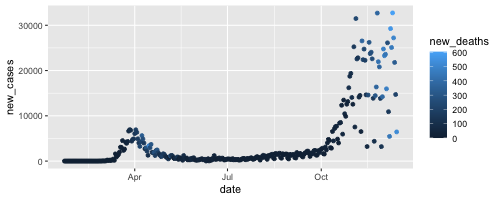

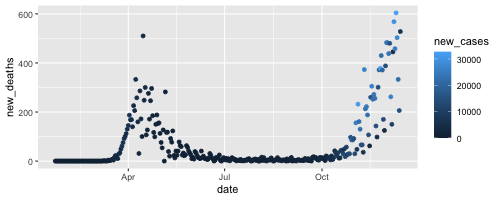

(RObject{VecSxp}
, RObject{VecSxp}
)

In [19]:
(plotcases(df,"Germany"),plotdeaths(df,"Germany"))

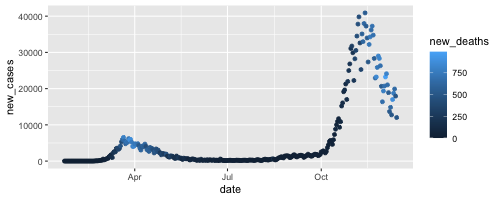

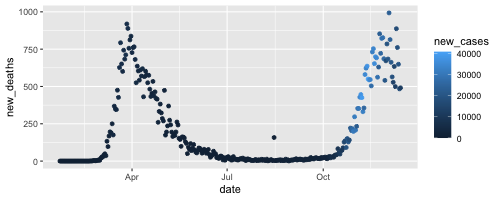

(RObject{VecSxp}
, RObject{VecSxp}
)

In [20]:
(plotcases(df,"Italy"),plotdeaths(df,"Italy"))

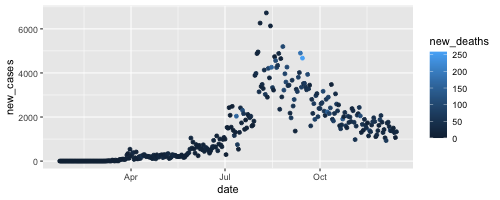

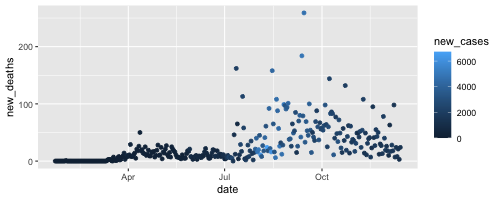

(RObject{VecSxp}
, RObject{VecSxp}
)

In [21]:
(plotcases(df,"Philippines"),plotdeaths(df,"Philippines"))

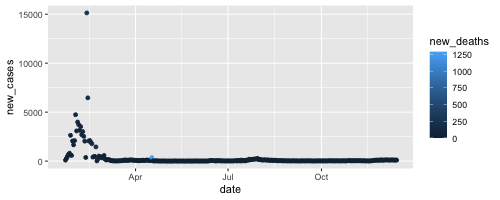

┌ Warning: RCall.jl: Warning: Removed 1 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160
┌ Warning: RCall.jl: Warning: Removed 1 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160


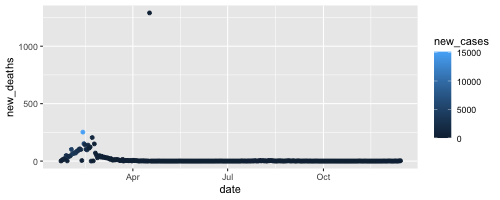

(RObject{VecSxp}
, RObject{VecSxp}
)

In [22]:
(plotcases(df,"China"),plotdeaths(df,"China"))

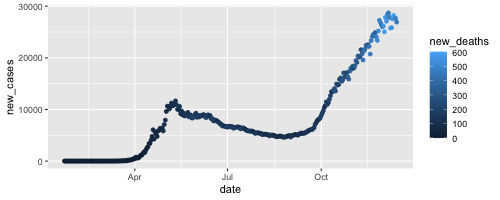

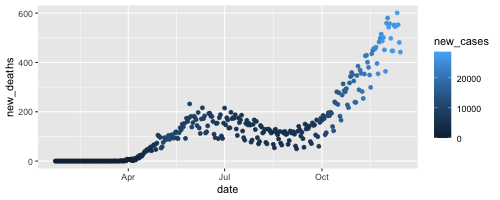

(RObject{VecSxp}
, RObject{VecSxp}
)

In [23]:
(plotcases(df,"Russia"),plotdeaths(df,"Russia"))

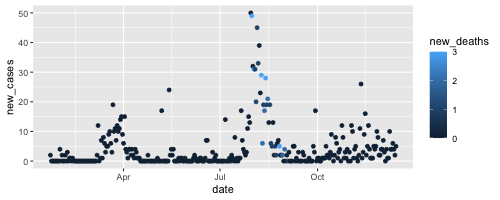

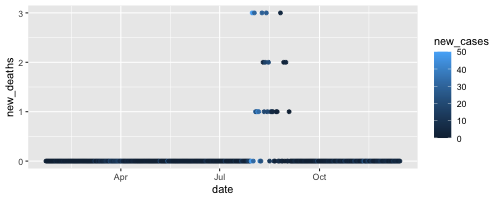

(RObject{VecSxp}
, RObject{VecSxp}
)

In [24]:
(plotcases(df,"Vietnam"),plotdeaths(df,"Vietnam"))

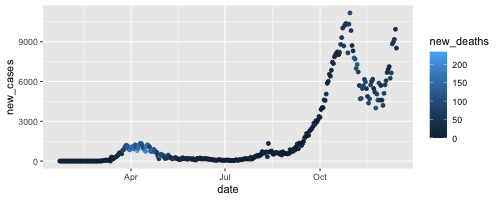

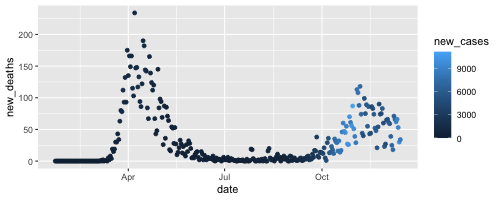

(RObject{VecSxp}
, RObject{VecSxp}
)

In [25]:
(plotcases(df,"Netherlands"),plotdeaths(df,"Netherlands"))

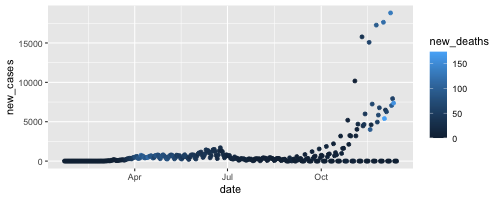

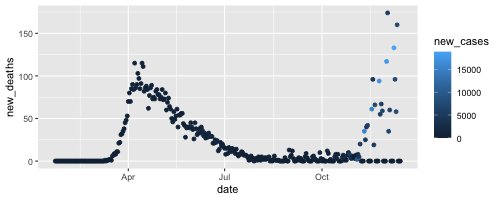

(RObject{VecSxp}
, RObject{VecSxp}
)

In [26]:
(plotcases(df,"Sweden"),plotdeaths(df,"Sweden"))

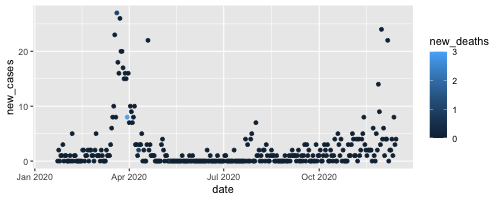

┌ Warning: RCall.jl: Warning: Removed 7 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160
┌ Warning: RCall.jl: Warning: Removed 7 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/eRsxl/src/io.jl:160


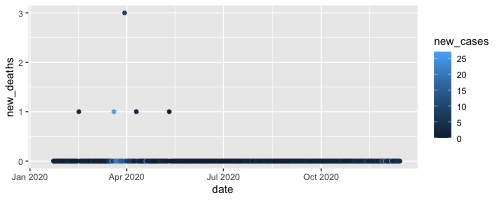

(RObject{VecSxp}
, RObject{VecSxp}
)

In [27]:
(plotcases(df,"Taiwan"),plotdeaths(df,"Taiwan"))

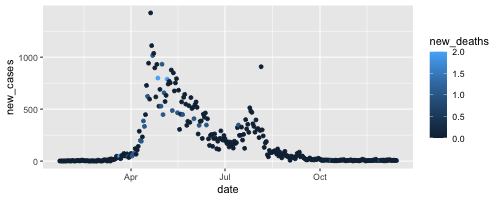

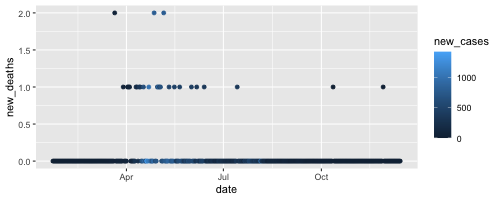

(RObject{VecSxp}
, RObject{VecSxp}
)

In [28]:
(plotcases(df,"Singapore"),plotdeaths(df,"Singapore"))